In [39]:
sys.path.insert(0,os.path.join(os.getcwd(),"../src/utils"))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import os
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim


from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from matplotlib.colors import LinearSegmentedColormap
from termcolor import colored

import experiment_utils as utils
from experiment_utils import PATH_ROOT, PATH_DATA 
import boilerplate

from model_arch import arch_setup
from model_arch import base_base_model

# Set seed for reproducibility of results
seed_value = 0
os.environ['PYTHONHASHSEED']=str(seed_value)


random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(0)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [41]:
train_x, train_y, val_x, val_y = boilerplate.classic_trainval(PATH_ROOT,PATH_DATA)

Everything is setup correctly


## Implementation

In [42]:
train_set = arch_setup.DS(train_x,train_y)
val_set= arch_setup.DS(val_x,val_y)

train_loader=DataLoader(dataset= train_set, batch_size = 16, shuffle = True, num_workers = 2)
val_loader=DataLoader(dataset= val_set, batch_size = 16, shuffle = True, num_workers = 2)

In [43]:
def init_weights(m):
    if (type(m) == nn.Linear) | (type(m) == nn.Conv2d):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [44]:
model= base_base_model.base_base_model()
model.apply(init_weights)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#TODO: implement the Glorot Normal
# init = tf.keras.initializers.GlorotNormal(seed = 0)


In [45]:
arch_setup.train_epochs(train_loader,val_loader,model,criterion,optimizer,num_epochs= 10,train_y=train_y,val_y=val_y)

started training epoch no. 1
torch.Size([1, 126, 32, 16])
torch.Size([3, 126, 32, 16])


RuntimeError: Given groups=1, weight of size [16, 1, 3, 3], expected input[16, 32, 3, 126] to have 1 channels, but got 32 channels instead

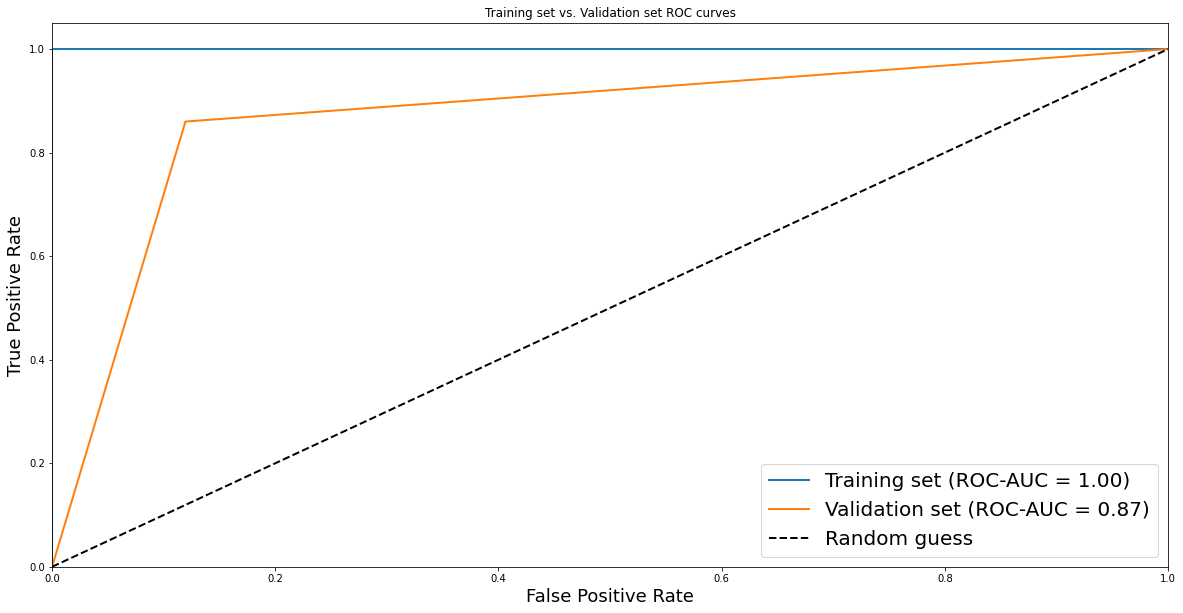

In [38]:
pred = [arch_setup.thresh(model(torch.from_numpy(train_x).type(torch.float32)).detach().cpu()),arch_setup.thresh(model(torch.from_numpy(val_x).type(torch.float32)).detach().cpu())]
actual = [train_y, val_y]
utils.stats(pred, actual)